In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from zipfile import ZipFile
from google.colab import drive

In [22]:
# Commented out lines import tsb.zip into google colab environment
# Need to upload the file to your google drive, below file path is in the root directory

# mount drive
# drive.mount('/content/gdrive')

# used for unzip files
# !unzip gdrive/My\ Drive/tsb.zip


# path to a image: tsb/basedata/training/bad-image/2.jpg
img = tf.keras.preprocessing.image.load_img('/content/tsb/basedata/training/bad-image/2.jpg')
# save the image to the current directory
img.save('2.jpg')

cv2.imread('2.jpg')
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [15]:
training_dataset = train.flow_from_directory('/content/tsb/basedata/training',
                                            target_size=(200,200),
                                            batch_size=3,
                                            class_mode='binary')

validation_dataset = train.flow_from_directory('/content/tsb/basedata/training',
                                            target_size=(200,200),
                                            batch_size=3,
                                            class_mode='binary')

Found 15 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [16]:
training_dataset.class_indices


{'bad-image': 0, 'good-image': 1}

In [17]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      # The second convolution
                                        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPooling2D(2,2),
                                        # The third convolution
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPooling2D(2,2),
                                        # The fourth convolution
                                        tf.keras.layers.Flatten(), 
                                        tf.keras.layers.Dense(512,activation='relu'),
                                        tf.keras.layers.Dense(1,activation='sigmoid')])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [18]:
model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(lr=0.001),
                metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [19]:
model.fit(training_dataset,
            steps_per_epoch=3,
            epochs=30,
            validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 3s 822ms/step - loss: 14.5214 - accuracy: 0.2222 - val_loss: 1.2447 - val_accuracy: 0.4667
Epoch 2/30
3/3 [==============================] - 2s 708ms/step - loss: 1.1406 - accuracy: 0.2222 - val_loss: 0.6455 - val_accuracy: 0.5333
Epoch 3/30
3/3 [==============================] - 2s 688ms/step - loss: 0.6914 - accuracy: 0.4444 - val_loss: 0.5614 - val_accuracy: 0.6667
Epoch 4/30
3/3 [==============================] - 2s 713ms/step - loss: 0.5134 - accuracy: 0.8889 - val_loss: 1.1905 - val_accuracy: 0.5333
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 0.6138 - accuracy: 0.7778 - val_loss: 1.0260 - val_accuracy: 0.4667
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 0.5938 - accuracy: 0.6667 - val_loss: 0.2877 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 0.2507 - accuracy: 1.0000 - val_loss: 0.6842 - val_accuracy: 0.6000
Epoch 8/30
3/3 [============

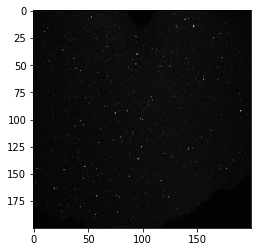

1/1 [==============================] - 0s 138ms/step
[1.]
good photo


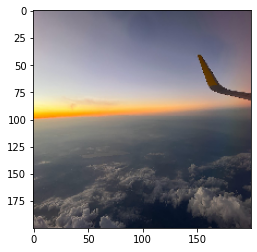

1/1 [==============================] - 0s 41ms/step
[1.]
good photo


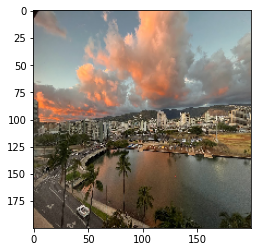

1/1 [==============================] - 0s 39ms/step
[1.]
good photo


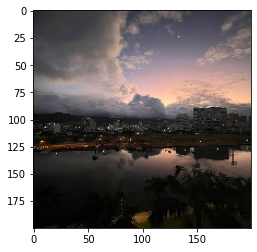

1/1 [==============================] - 0s 42ms/step
[1.]
good photo


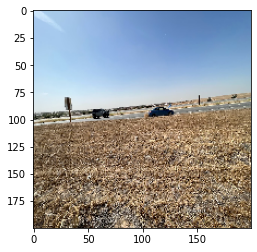

1/1 [==============================] - 0s 48ms/step
[0.]
bad photo


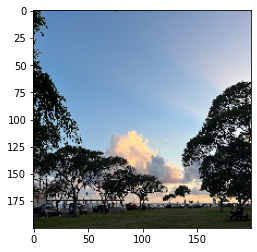

1/1 [==============================] - 0s 37ms/step
[1.]
good photo


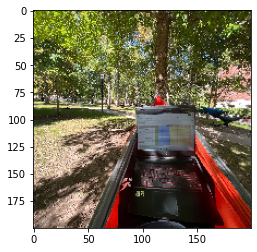

1/1 [==============================] - 0s 40ms/step
[0.]
bad photo


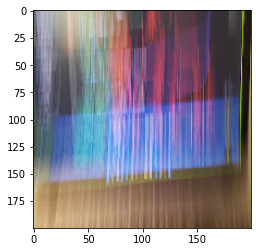

1/1 [==============================] - 0s 45ms/step
[0.]
bad photo


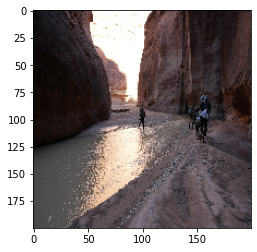

1/1 [==============================] - 0s 42ms/step
[1.]
good photo


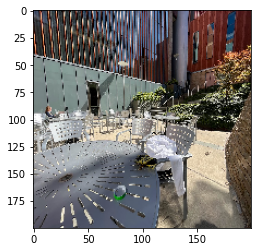

1/1 [==============================] - 0s 43ms/step
[4.122739e-14]
good photo


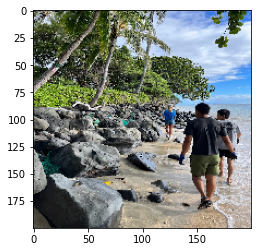

1/1 [==============================] - 0s 44ms/step
[1.]
good photo


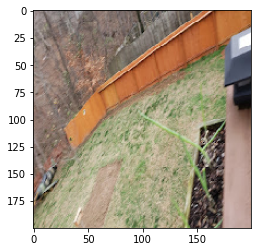

1/1 [==============================] - 0s 42ms/step
[1.]
good photo


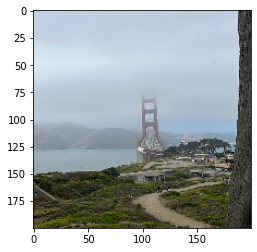

1/1 [==============================] - 0s 40ms/step
[0.]
bad photo


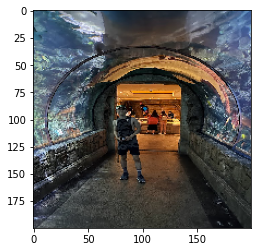

1/1 [==============================] - 0s 46ms/step
[1.7800932e-19]
good photo


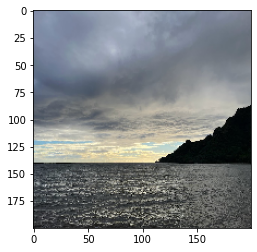

1/1 [==============================] - 0s 45ms/step
[0.]
bad photo


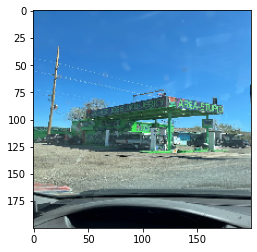

1/1 [==============================] - 0s 45ms/step
[0.01026949]
good photo


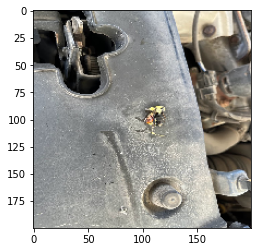

1/1 [==============================] - 0s 49ms/step
[0.]
bad photo


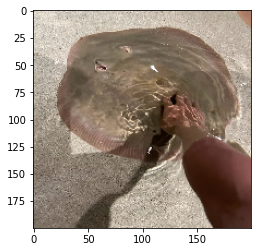

1/1 [==============================] - 0s 52ms/step
[1.]
good photo


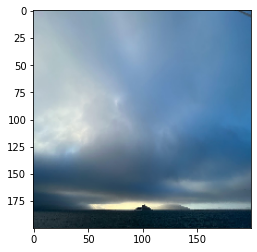

1/1 [==============================] - 0s 53ms/step
[0.]
bad photo


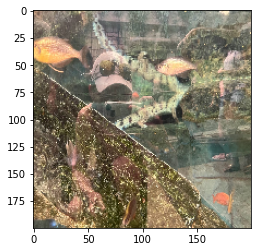

1/1 [==============================] - 0s 57ms/step
[0.9988445]
good photo


In [25]:
dir_path = '/content/tsb/basedata/testing'
for img in os.listdir(dir_path):
    img = tf.keras.preprocessing.image.load_img(dir_path + '/' + img, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    X = tf.keras.preprocessing.image.img_to_array(img)
    X = np.expand_dims(X, axis=0)

    images = np.vstack([X])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]==0:
        print('bad photo')
    else:
        print('good photo')